# Fourier Transform Lab
### **Analog and Digital Signal Processing** - Fall 2020 <br>
**TAs: Eng. Mahmoud Shabaan**

As a quick reminder, the definitions of the direct and inverse DFT for a length-$N$ signal are:

\begin{align*}
    X[k] &= \sum_{n=0}^{N-1} x[n]\, e^{-j\frac{2\pi}{N}nk}, \quad k=0, \ldots, N-1 \\
    x[n] &= \frac{1}{N}\sum_{k=0}^{N-1} X[k]\, e^{j\frac{2\pi}{N}nk}, \quad n=0, \ldots, N-1
\end{align*}

The DFT produces a complex-valued vector that we can represent either via its real and imaginary parts or via its magnitude $|X[k]|$ and phase $\angle X[k] = \arctan \frac{\text{Im}\{X[k]\}}{\text{Re}\{X[k]\}}$.

In [ ]:
# First, the usual bookkeeping
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

In [ ]:
# We define some useful constants:
pii = np.pi # Identifying pi 
j = np.complex(0,1) # identifying the complex number j

Next, we define a function that creates the time axis

In [ ]:
# We define some useful Functions:
def time_axis(fm,fs):
    """
    Function that resturn time axis ranging from 0 to fm with sampling frequency fs
    fm : signal frequency
    fs: sampling frequecny 
    return t: time axis 
    """
    ts = 1 / fs
    t = np.arange( 0 , fm, ts)
    return t

## Sampling Frequency

As we are manipulating digital signals, these signals have to be discrete in time, i.e. has value at specified time instances. To convert an analog signal to digital signal, the analog signal must be sampled, with the sampling frequency chosen taking the signal's frequency into consideration. 

![Analog to digital conversion](./ADC.PNG)





To  show the effect of using different sampling rates, we define a sinusiodal waveform with different sampling frequencies and observe the difference.

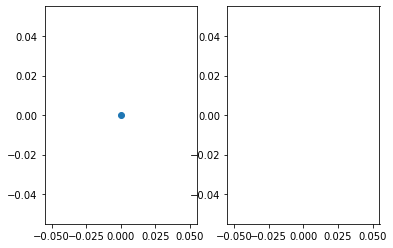

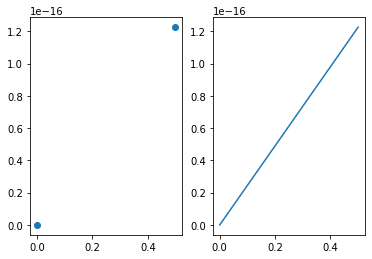

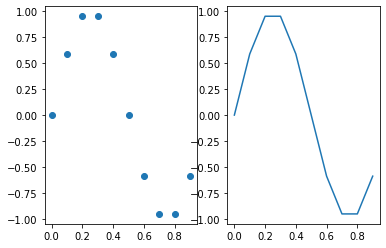

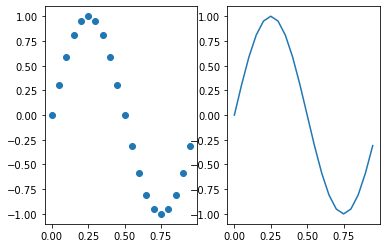

In [ ]:
fm = 1
fs1 = fm
fs2 = 2 * fm
fs3 = 10 * fm
fs4 = 20 * fm
    
t1 = time_axis(fm, fs1) 
t2 = time_axis(fm, fs2) 
t3 = time_axis(fm, fs3) 
t4 = time_axis(fm, fs4) 

y1 = np.sin(2 * pii * fm * t1)
y2 = np.sin(2 * pii * fm * t2)
y3 = np.sin(2 * pii * fm * t3)
y4 = np.sin(2 * pii * fm * t4)

plt.subplot(1,2,1)
plt.scatter(t1, y1)
plt.subplot(1,2,2)
plt.plot(t1, y1)

plt.figure(2)
plt.subplot(1,2,1)
plt.scatter(t2,y2)
plt.subplot(1,2,2)
plt.plot(t2, y2)

plt.figure(3)
plt.subplot(1,2,1)
plt.scatter(t3,y3)
plt.subplot(1,2,2)
plt.plot(t3, y3)

plt.figure()
plt.subplot(1,2,1)
plt.scatter(t4,y4)
plt.subplot(1,2,2)
plt.plot(t4, y4)

Now, we redefine the time_axis function using sampling frequency = 20 * fm

In [ ]:
def time_axis(fm):
    """
    Function that resturn time axis ranging from -2 * fm to 2 * fm with sampling frequency fs  = 20 * fm
    fm : signal frequency
    fs: sampling frequecny 
    return t: time axis 
    """
    fs = 20 * fm
    ts =1 / fs
    t = np.arange(-2/fm, 2 / fm, ts)
    return t, fs

In [ ]:
#Basic rectangular pulse
def rect(t):
    """
    Function that creates a rectagular Pulse signal with time axis t
    t : time
    return rectagular pulse signal 
    """
    return  1*(abs(t) < 1)

### Creating some signals <br>
**1. Sin Waveform** <br>
X=$sin(2*\pi*fm*t) $ <br>
Define a sine waveform with frequency = 2 Hz. Then, plot the waveform in time.

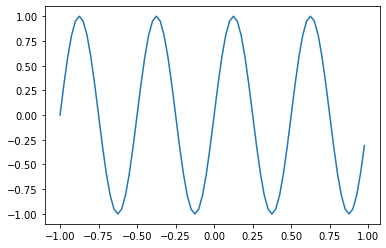

In [ ]:
# Your code here
fm = 2
t1, fs1 = time_axis(fm)
x = np.sin(2*pii*fm*t1)
plt.plot(t1,x)

**2. Rect pulse waveform** <br>
Plot a rectangular pulse waveform, zero centered and width =2.


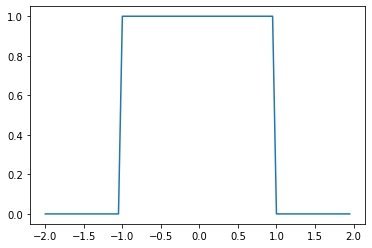

In [ ]:
#Write your code.
t_rect,fs_rect=time_axis(1)
x2=rect(t_rect)
plt.plot(t_rect,x2)


### **Fourier Transform**  <br>

In Python, we will use the `fft` module in Numpy to compute the DFT

Check the following link for the documenation of  the `fft` module:
[link text]((https://numpy.org/doc/stable/reference/routines.fft.html))

In [ ]:
def Fourier_Transform (x,fs):
    """
    Function that calculates the fourier tranform of a given signal x
    x : Input signal
    fs : sampling frequency of input signal
    return X: calculated fourier transform of signal, f: Frequency axis for the calculated frouier transorm 
    """    
    X = np.fft.fft(x);
    f = np.fft.fftfreq(len(X), (1/fs))
    return X, f

1.Sketch the fourier Transform of the sine wave in frequency domain.

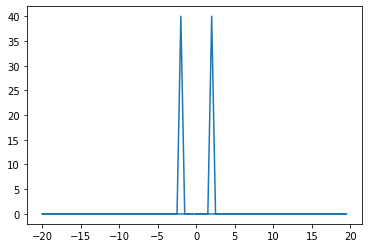

In [ ]:
#Sin/Cos Wave
y1, F =Fourier_Transform (x,fs1) 
plt.plot(F,abs(y1))


2.Sketch the fourier Transform of the rect pulse in frequency domain.

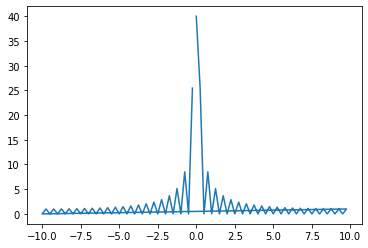

In [ ]:
#rectangular pulse
y2, f2 =Fourier_Transform (x2,fs_rect) 
plt.plot(f2,abs(y2))


### **Fourier Transform Properties**  <br>
**1. Linearity** $$a(t)+b(t)=A(f)+B(f)$$ <br>
1.Define a rect pulse **m1** with center=1, Amplitude=1 and width =2.<br>
2.Define a rect pulse **m2** with center=-1, Amplitude=-1 and width =2.<br>
2.Create a rect pulse **m** which is the addition of two signals m1 and m2 in time. 



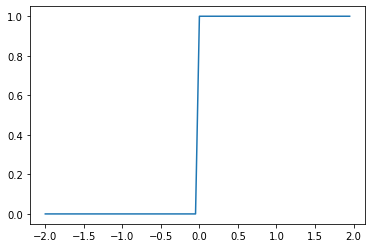

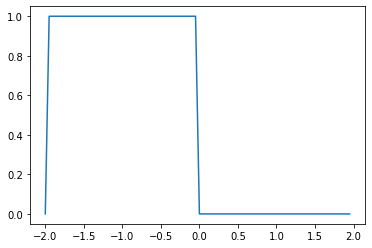

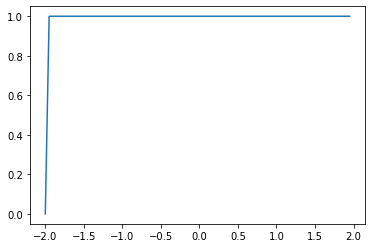

In [ ]:

#Write your code.
t_rect1,fs_rect1=time_axis(1)
m1 =rect(t_rect1-1)
m2 =rect(t_rect1+1)
plt.plot(t_rect1,m1)
plt.figure()
plt.plot(t_rect1,m2)
m=m1+m2
plt.figure()
plt.plot(t_rect1,m)

1.Calculate the fourier Transform of m1, m2 and m <br>
  
  fs = fs_rect defined before<br>
<br>
2.Calculate M_ which is the sum of the fourier transform of the 2 signal, m1 + m2

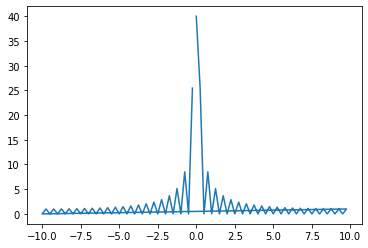

In [ ]:
y2, f2 =Fourier_Transform (x2,fs_rect) 
plt.plot(f2,abs(y2))
# Your code here
M1, f1 =Fourier_Transform (m1,fs_rect1)
M2, f2 =Fourier_Transform (m2,fs_rect1)
M, f = Fourier_Transform (m,fs_rect1)

M_ =M1+M2

Now, we plot the signals in time and frequency domain

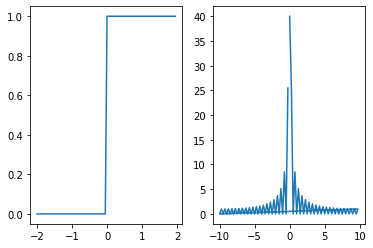

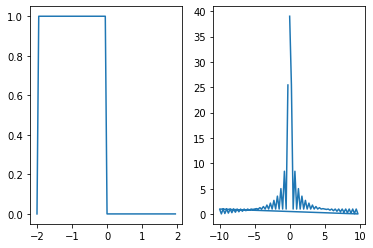

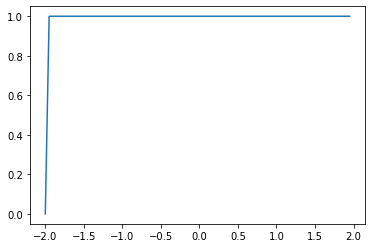

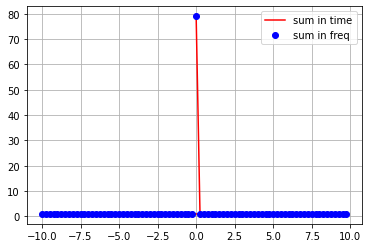

In [ ]:
plt.subplot(1,2,1)
plt.plot(t_rect, m1)
plt.subplot(1,2,2)
plt.plot(f1, abs(M1))

plt.figure(2)
plt.subplot(1,2,1)
plt.plot(t_rect, m2)
plt.subplot(1,2,2)
plt.plot(f2, abs(M2))

plt.figure(3)
plt.plot(t_rect, m)
plt.figure(4)
plt.plot(f, abs(M),'r',f,abs(M_),'ob')
plt.grid()
plt.legend(('sum in time', 'sum in freq'))

**2. Frequency Shift** $$f(t)* e^{j*W_o*t} ----> F(W-W_0)$$

In [ ]:
def time_axis(fm):
    """
    Function that resturn time axis ranging from -2 * fm to 2 * fm with sampling frequency fs  = 20 * fm
    fm : signal frequency
    fs: sampling frequecny 
    return t: time axis 
    """
    fs = 20 * fm
    ts =1 / fs
    t = np.arange(-2*fm, 2 * fm, ts)
    return t, fs

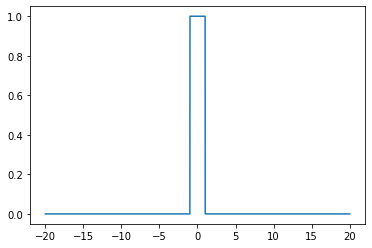

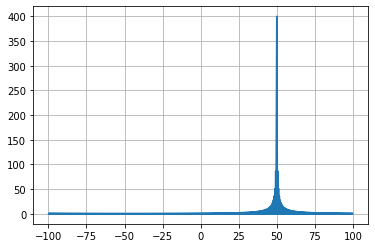

In [ ]:
import math
t_sh,fs_sh = time_axis(10)
xf = rect(t_sh)
plt.plot(t_sh,xf)

f0=50 #10,20,-20   #fo must be smaller than fs/2=50
w0=2*pii*f0
n=np.exp(j*w0*t_sh)
# Your code herer
xf =xf*n

XF, F = Fourier_Transform (xf,fs_sh)
plt.figure(2)
plt.plot(F,abs(XF))
plt.grid()

**4. Scaling** $$ f(at)--->\frac{1}{a} F(\frac{w}{a})$$

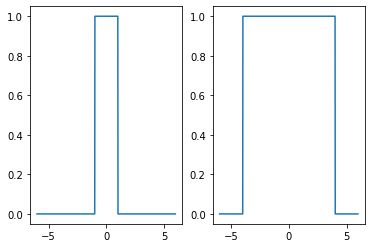

<Figure size 432x288 with 0 Axes>

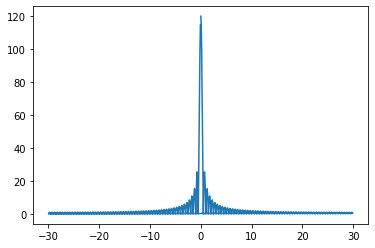

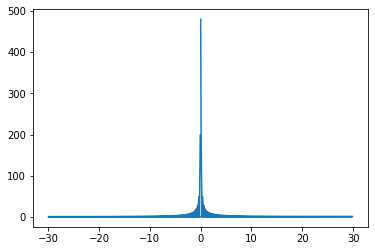

In [ ]:
t_sc,fs_sc=time_axis(3)
x_sc=rect(t_sc)
plt.subplot(1,2,1)
plt.plot(t_sc,x_sc)

a=1/4 #4,1/4

xs2=rect(a * t_sc) #f(1/a * t)
plt.subplot(1,2,2)
plt.plot(t_sc, xs2)

plt. figure (2)

XS1,F1 = Fourier_Transform (x_sc,fs=fs_sc)
plt. figure (3)
plt.plot(F1,abs(XS1))

XS2,F2=Fourier_Transform (xs2,fs=fs_sc)
plt. figure (4)
plt.plot(F2,abs(XS2))

### **Fourier Transform Applicatin in real world**  <br>

The next step is to use the DFT to analyze real-world signals. As we have seen in previous examples, what we need to do is set the time interval between samples or, in other words, set the "clock" of the system. For audio, this is equivalent to the sampling rate of the file.

Here for instance is the sound of a piano.

In [ ]:
import IPython
from scipy.io import wavfile
Fs, xm = wavfile.read("piano.wav")
IPython.display.Audio(xm, rate=Fs)

FileNotFoundError: ignored

In [ ]:
X,F = Fourier_Transform (xm,Fs)
plt.plot(F,  abs(X))